***
## Домашнее задание №8
***

In [2]:
import numpy as np

In [5]:
import scipy.stats as stats

In [6]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):\
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], \
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].\
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.\
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.\
Полученные значения должны быть равны.

### Решение:

In [34]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. С помощью графика определим существует ли линейная зависимость между данными в двух выборках

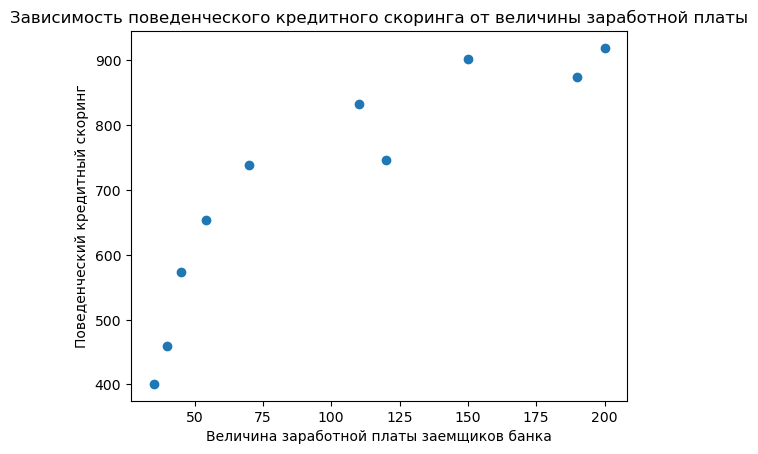

In [95]:
plt.scatter(zp,ks)
plt.title('Зависимость поведенческого кредитного скоринга от величины заработной платы')
plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

На графике видно, что большим значениям заработной платы замещиков банка соответсвуют большие значения кредитного скоринга. Следовательно между данными возможна прямая линейная зависимость

2. Рассчитаем ковариацию (смещенную) с помощью формулы:   $cov_x,y=M(XY)-M(X)*M(Y)$,\
где $M$ - математическое ожидание

In [52]:
def Get_cov(array1, array2):
    M_XY = sum(array1 * array2) / len(array1)
    M_X = sum(array1) / len(array1)
    M_Y = sum(array2) / len(array2)
    return M_XY - M_X * M_Y

In [53]:
print(f'ковариация, рассчитанная по формуле: {Get_cov(zp, ks): .2f}')

ковариация, рассчитанная по формуле:  9157.84


3. Рассчитаем ковариацию с помощью функции cov из библиотеки numpy (установим параметр ddof=0, чтобы рассчитать смещенную) 

In [44]:
np.cov(zp, ks, ddof=0)
print(f'ковариация, рассчитанная с помощью функции: {np.cov(zp, ks, ddof=0)}')

ковариация, рассчитанная с помощью функции: [[ 3494.64  9157.84]
 [ 9157.84 30468.89]]


4. Рассчитаем коэффициент корреляции Пирсона по формуле: $\displaystyle r_{X,Y}=\frac{cov_{X,Y}}{\sigma_X\cdot\sigma_Y}$,\
где $\sigma$ - среднее квадратическое отклонение\
поскольку в решении задачи была рассчитана  смещенная ковариация, то среднее квадратическое отклонение тоже рассчитаем смещенное

In [89]:
def Get_mean_square_deviation(array):
    mean_array = sum(array) / len(array)
    square_dev = (array-mean_array)**2
    return (sum(square_dev)/(len(array)))**(1/2)

In [90]:
corrcoef = Get_cov(zp, ks) / (Get_mean_square_deviation(zp) * Get_mean_square_deviation(ks))

In [91]:
print(f'Коэффициент корреляции Пирсона, рассчитанный с помощью формулы: {corrcoef: .5f}')

Коэффициент корреляции Пирсона, рассчитанный с помощью формулы:  0.88749


5. Рассчитаем коэффициент корреляции с помощью функции corrcoef библиотеки numpy

In [93]:
np.corrcoef(zp, ks)
print(f'Коэффициент корреляции, рассчитанный с помощью функции: {np.corrcoef(zp, ks)}')

Коэффициент корреляции, рассчитанный с помощью функции: [[1.         0.88749009]
 [0.88749009 1.        ]]


6. Рассчитаем коэффициент корреляции с помощью функции corr библиотеки pandas

In [94]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [88]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


***
### Ответ:
**Между величиной заработной платы заемщиков банка и значениями их поведенческого кредитного скоринга существует сильная прямая линейная зависимость.**
***

### Задача 2
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111.\
Известно, что в генеральной совокупности IQ распределен нормально.\
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

#### Решение:
В условии задачи $\sigma$ неизвестна, следовательно для ее решения будем использовать t - критерий Стюдента.\
Границы доверительного интервала рассчитаем по формуле: $\displaystyle\bar X\pm t_{\alpha/2}\cdot\frac{\sigma_{несмещ}}{\sqrt{n}}$, где  
$\sigma_{несмещ}$ - несмещённое среднее квадратическое отклонение выборки, \
$n$ - размер выборки

In [98]:
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
n = len(x)

In [99]:
x_avg = np.mean(x)
s = np.std(x, ddof=1)
t_tabl = stats.t.ppf(0.975, n-1)
print(f'Среднее значение по выборке: {x_avg: .2f} \n'
     f'Среднее квадратическое отклонение выборки (несмещенное): {s: .2f} \n'
     f'Табличное значение t - критерия Стьюдента для вероятности 0,95: {t_tabl: .7f}')

Среднее значение по выборке:  118.10 
Среднее квадратическое отклонение выборки (несмещенное):  10.55 
Табличное значение t - критерия Стьюдента для вероятности 0,95:  2.2621572


In [100]:
left = x_avg - t_tabl * s / n**0.5
rigth = x_avg + t_tabl * s / n**0.5
print(f'Доверительный интервал математического ожидания с надежностью 0,95 составляет [{left:.2f}; {rigth:.2f}]')

Доверительный интервал математического ожидания с надежностью 0,95 составляет [110.56; 125.64]


***
### Ответ:
**Для математического ожидания выборки 118,1 доверительный интервал с надежностью 0,95 составляет: [110.56;  125.64]**
***

### Задача 3
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

#### Решение:
Поскольку нам известна дисперсия генеральной совокупности, то для решения задачи, будем использовать $Z$-критерий.\
Границы доверительного интервала расчитаем по формуле: $\displaystyle\bar X\pm z_{\alpha/2}\cdot\frac{\sqrt{\sigma^2}}{\sqrt n}$, где:  
$\bar X$ - среднее значение выборки    
$z_{\alpha/2}$ - табличное значение $Z$-критерия, и для $95\%$-го доверительного интервала $z_{\alpha/2}=1,96$  
$D=\sigma^2$ - среднее квадратическое отклонение генеральной совокупности  
$n$ - объем выборки

In [104]:
M = 174.2
D = 25
n = 27
z_table = stats.norm.ppf(0.975)

In [106]:
left = M - z_table * D**0.5 / n**0.5
rigth = M + z_table * D**0.5 / n**0.5
print(f'Доверительный интервал математического ожидания с надежностью 0,95 составляет [{left:.2f}; {rigth:.2f}]')

Доверительный интервал математического ожидания с надежностью 0,95 составляет [172.31; 176.09]


***
### Ответ:
**Доверительный интервал математического ожидания составляет [172.31; 176.09]. С вероятностью 0,95 он захватит истинное среднее значение генеральной совокупности.**
***